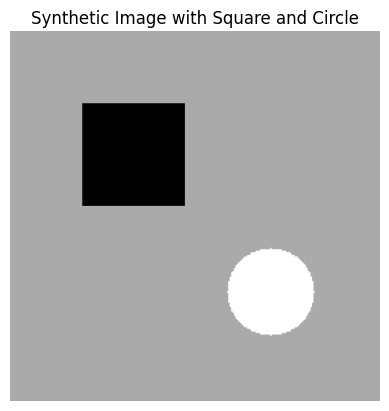

True

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Image size (height, width)
height, width = 256, 256

# Create a blank image with a gray background
background_intensity = 150
image = np.full((height, width), background_intensity, dtype=np.uint8)

# Draw a filled square in the image
square_intensity = 50
top_left = (50, 50)
bottom_right = (120, 120)
cv2.rectangle(image, top_left, bottom_right, square_intensity, -1)  # -1 means filled

# Draw a filled circle in the image
circle_intensity = 200
center = (180, 180)
radius = 30
cv2.circle(image, center, radius, circle_intensity, -1)

# Show the synthetic image
plt.imshow(image, cmap='gray')
plt.title('Synthetic Image with Square and Circle')
plt.axis('off')
plt.show()

# Save the image if needed
cv2.imwrite('synthetic_image.png', image)


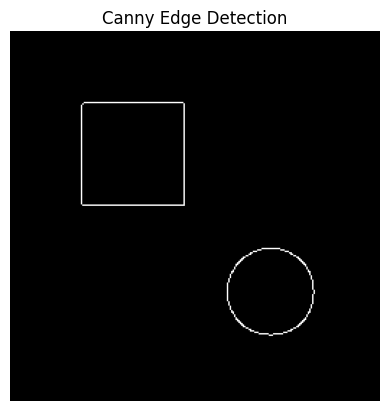

In [2]:
# Apply Canny edge detection
canny_edges = cv2.Canny(image, 100, 200)

# Show the Canny edge result
plt.imshow(canny_edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')
plt.show()


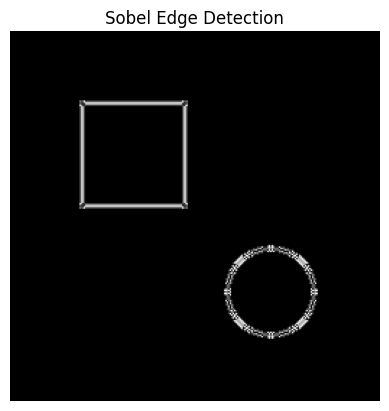

In [3]:
# Apply Sobel edge detection in both x and y directions
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)  # x-direction
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)  # y-direction

# Combine both x and y Sobel results using magnitude
sobel_edges = np.sqrt(sobel_x**2 + sobel_y**2)
sobel_edges = np.uint8(sobel_edges)

# Show the Sobel edge result
plt.imshow(sobel_edges, cmap='gray')
plt.title('Sobel Edge Detection')
plt.axis('off')
plt.show()


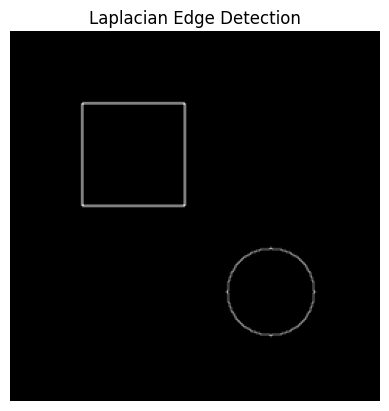

In [4]:
# Apply Laplacian edge detection
laplacian_edges = cv2.Laplacian(image, cv2.CV_64F)
laplacian_edges = np.uint8(np.abs(laplacian_edges))

# Show the Laplacian edge result
plt.imshow(laplacian_edges, cmap='gray')
plt.title('Laplacian Edge Detection')
plt.axis('off')
plt.show()


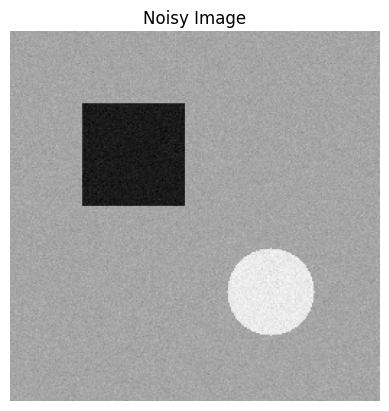

In [20]:
# Add Gaussian noise to the image
noise_sigma = 5
noisy_image = image + np.random.normal(0, noise_sigma, image.shape).astype(np.uint8)

# Clip values to keep them between 0 and 255
noisy_image = np.clip(noisy_image, 0, 255)

# Show the noisy image
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image')
plt.axis('off')
plt.show()


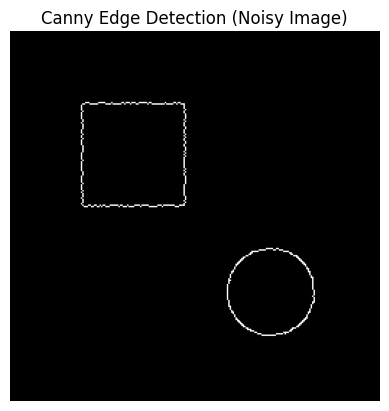

In [21]:
# Canny Edge Detection on noisy image
canny_noisy_edges = cv2.Canny(noisy_image, 100, 200)
plt.imshow(canny_noisy_edges, cmap='gray')
plt.title('Canny Edge Detection (Noisy Image)')
plt.axis('off')
plt.show()


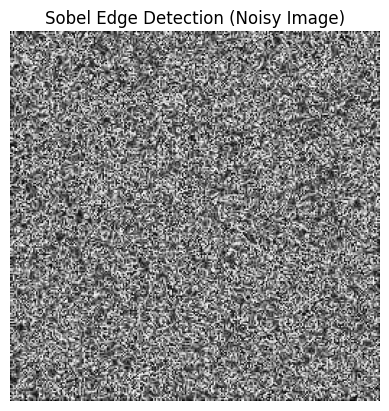

In [22]:
# Sobel Edge Detection on noisy image
sobel_x_noisy = cv2.Sobel(noisy_image, cv2.CV_64F, 1, 0, ksize=5)
sobel_y_noisy = cv2.Sobel(noisy_image, cv2.CV_64F, 0, 1, ksize=5)
sobel_noisy_edges = np.sqrt(sobel_x_noisy**2 + sobel_y_noisy**2)
sobel_noisy_edges = np.uint8(sobel_noisy_edges)

plt.imshow(sobel_noisy_edges, cmap='gray')
plt.title('Sobel Edge Detection (Noisy Image)')
plt.axis('off')
plt.show()


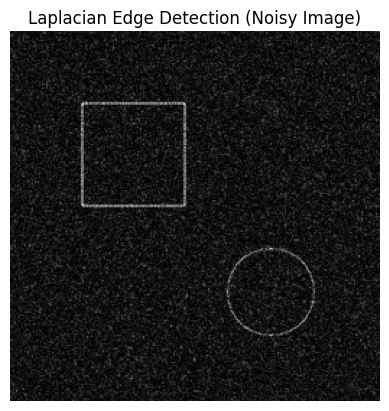

In [23]:
# Laplacian Edge Detection on noisy image
laplacian_noisy_edges = cv2.Laplacian(noisy_image, cv2.CV_64F)
laplacian_noisy_edges = np.uint8(np.abs(laplacian_noisy_edges))

plt.imshow(laplacian_noisy_edges, cmap='gray')
plt.title('Laplacian Edge Detection (Noisy Image)')
plt.axis('off')
plt.show()


In [24]:
def evaluate_performance(detected_edges, true_edges):
    # True Positives: Correctly detected edge pixels
    true_positives = np.sum((detected_edges == 255) & (true_edges == 255))

    # False Positives: Detected edges that are not true edges
    false_positives = np.sum((detected_edges == 255) & (true_edges == 0))

    # False Negatives: Missed edges
    false_negatives = np.sum((detected_edges == 0) & (true_edges == 255))

    # Performance metrics
    accuracy = true_positives / (true_positives + false_negatives + 1e-10)
    false_positive_rate = false_positives / (false_positives + true_positives + 1e-10)
    false_negative_rate = false_negatives / (false_negatives + true_positives + 1e-10)

    return accuracy, false_positive_rate, false_negative_rate

# Generate true edges from the known shapes (square + circle)
true_edges = np.zeros_like(image)
cv2.rectangle(true_edges, top_left, bottom_right, 255, 1)
cv2.circle(true_edges, center, radius, 255, 1)

# Evaluate Canny performance
canny_accuracy, canny_fpr, canny_fnr = evaluate_performance(canny_edges, true_edges)
print(f"Canny - Accuracy: {canny_accuracy:.2f}, False Positive Rate: {canny_fpr:.2f}, False Negative Rate: {canny_fnr:.2f}")

# Evaluate Sobel performance
sobel_threshold = 100
sobel_binary = np.uint8(sobel_edges > sobel_threshold) * 255
sobel_accuracy, sobel_fpr, sobel_fnr = evaluate_performance(sobel_binary, true_edges)
print(f"Sobel - Accuracy: {sobel_accuracy:.2f}, False Positive Rate: {sobel_fpr:.2f}, False Negative Rate: {sobel_fnr:.2f}")

# Evaluate Laplacian performance
laplacian_binary = np.uint8(laplacian_edges > sobel_threshold) * 255
laplacian_accuracy, laplacian_fpr, laplacian_fnr = evaluate_performance(laplacian_binary, true_edges)
print(f"Laplacian - Accuracy: {laplacian_accuracy:.2f}, False Positive Rate: {laplacian_fpr:.2f}, False Negative Rate: {laplacian_fnr:.2f}")


Canny - Accuracy: 0.54, False Positive Rate: 0.50, False Negative Rate: 0.46
Sobel - Accuracy: 0.79, False Positive Rate: 0.65, False Negative Rate: 0.21
Laplacian - Accuracy: 0.02, False Positive Rate: 0.00, False Negative Rate: 0.98
